In [11]:
#########################################
#install the requried package
install.packages('datasets')

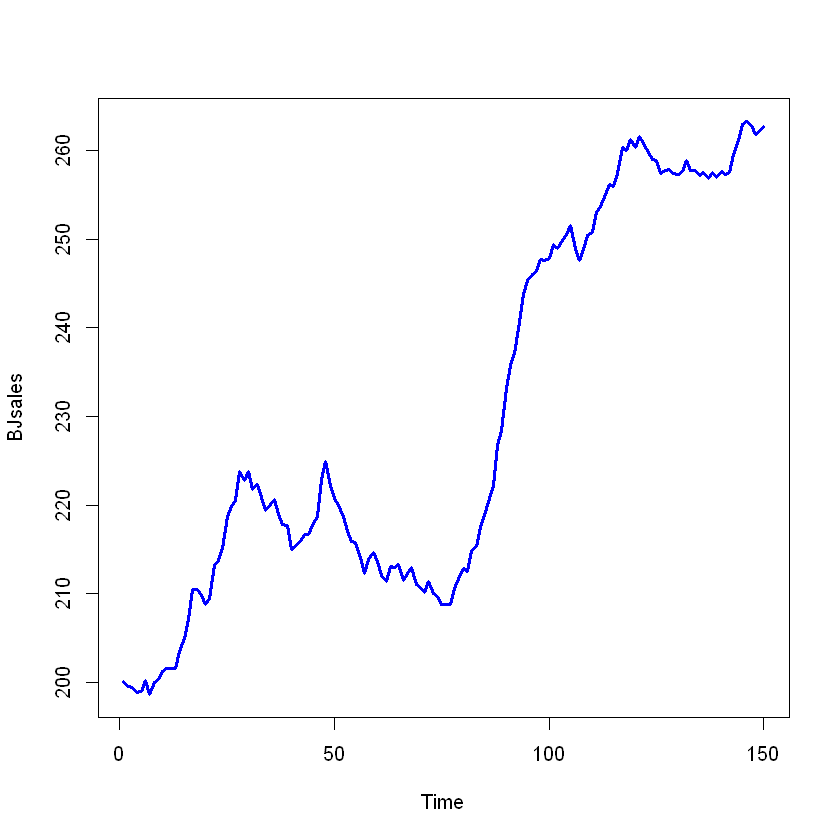

In [2]:
#Lets have a look  at the data
plot(BJsales, col='blue', lwd=3)

# There is upward and down ward trend. Time series is not stationary

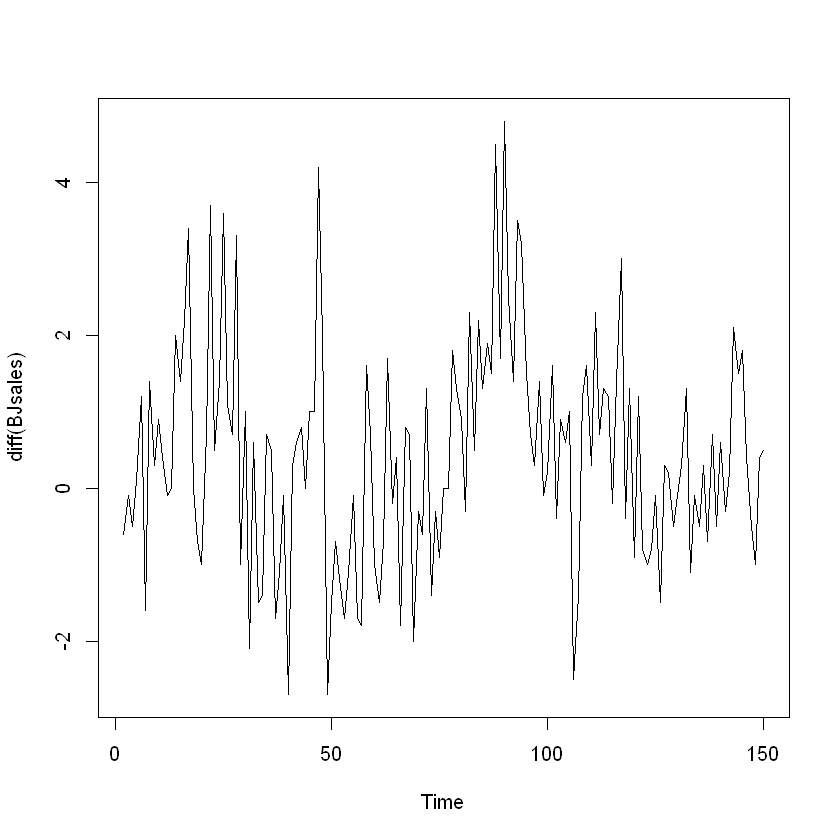

In [3]:
#Plot the diff as there is a trend in the above plot making the data non stationary
plot(diff(BJsales))

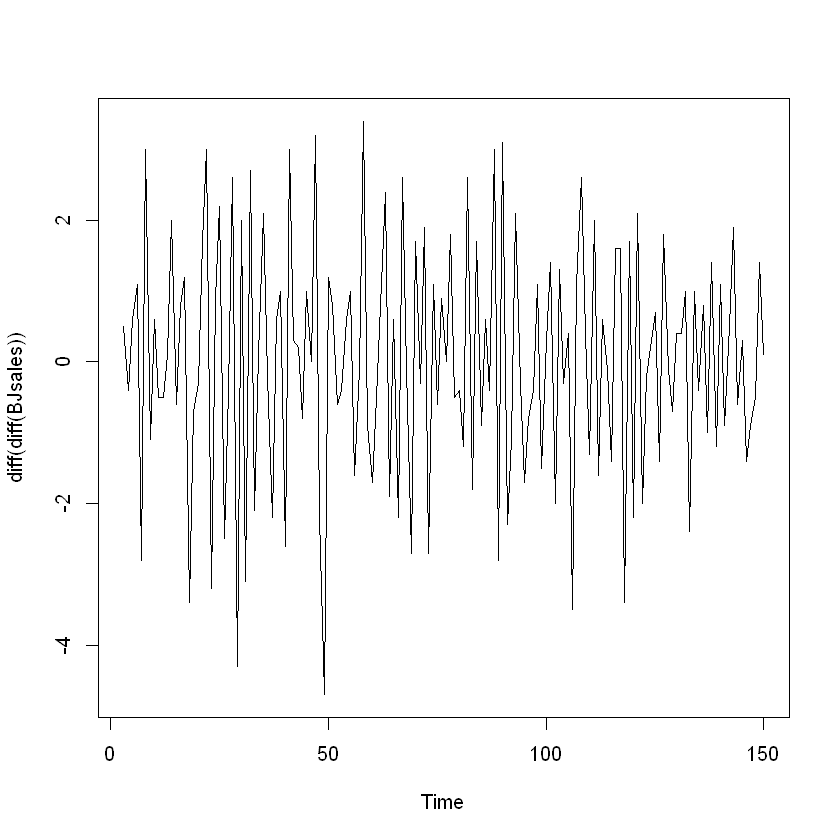

In [4]:
#Still non stationery, take diff again and plot
plot(diff(diff(BJsales)))

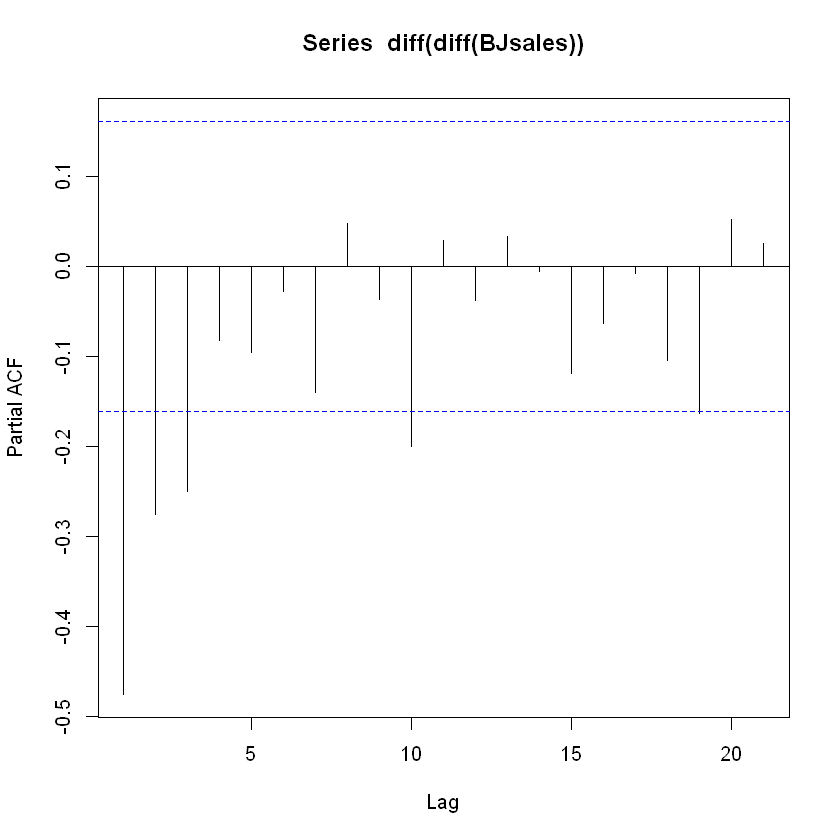

In [5]:
#look at the PACF
pacf(diff(diff(BJsales)))

#Ignoring less significant lags, order of AR term can be 0,1,2 or 3

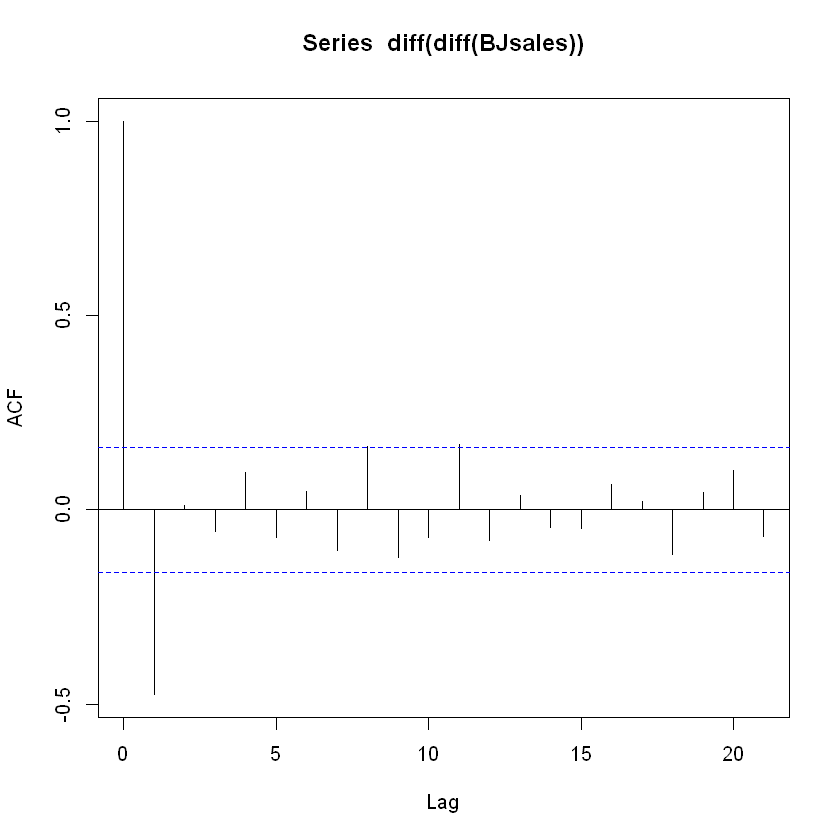

In [6]:
#Look at the ACF
acf(diff(diff(BJsales)))

#Ignoring less significant lags, order of MA term can be 0 or 1

In [7]:
#Lets look at the AIC and SSE for different combination of model parameters:
d=2 # since we had to take difference two times
for(p in 1:4){
  for(q in 1:2){
    if(p+d+q<=6){
      model<-arima(x=BJsales, order = c((p-1),d,(q-1)))
      pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
      sse<-sum(model$residuals^2)
      cat(p-1,d,q-1, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
    }
  }
}

# we see model ARIMA(0,2,1) gives lowest AIC value and model ARIMA(1,2,1) gives lowest SSE.
# To make less complex model, ARIMA(0,2,1) is selected

0 2 0 AIC= 577.6777  SSE= 423.7908  p-VALUE= 7.610494e-07 
0 2 1 AIC= 517.1371  SSE= 276.2293  p-VALUE= 0.9632467 
1 2 0 AIC= 541.9646  SSE= 327.92  p-VALUE= 0.003606979 
1 2 1 AIC= 518.9734  SSE= 275.8554  p-VALUE= 0.941776 
2 2 0 AIC= 532.2986  SSE= 302.7467  p-VALUE= 0.05824473 


In [8]:
# Lets look at the model parameters
model<-arima(BJsales, order=c(0,2,1))
model


Call:
arima(x = BJsales, order = c(0, 2, 1))

Coefficients:
          ma1
      -0.7480
s.e.   0.0662

sigma^2 estimated as 1.866:  log likelihood = -256.57,  aic = 517.14

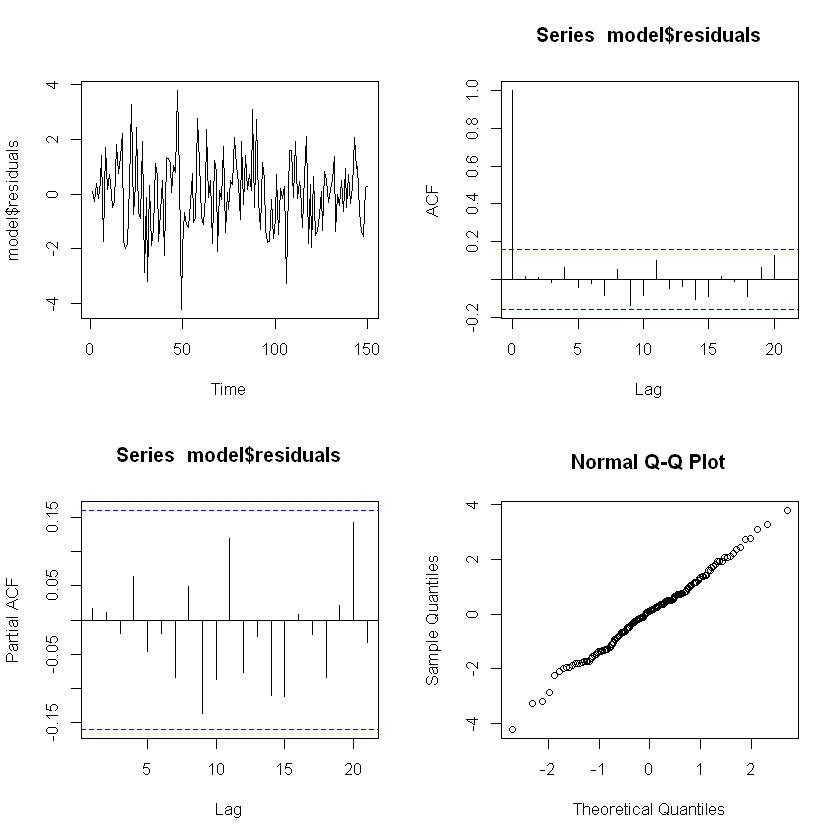

In [9]:
#Lets look at the residuals
par(mfrow=c(2,2))
plot(model$residuals)
acf(model$residuals)
pacf(model$residuals)
qqnorm(model$residuals)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
151       262.9837 261.2331 264.7343 260.3065 265.6610
152       263.2674 260.4624 266.0724 258.9775 267.5573
153       263.5511 259.7040 267.3982 257.6674 269.4348
154       263.8348 258.9103 268.7593 256.3035 271.3662
155       264.1185 258.0681 270.1690 254.8652 273.3719
156       264.4022 257.1730 271.6314 253.3461 275.4583
157       264.6859 256.2242 273.1476 251.7448 277.6270
158       264.9696 255.2221 274.7172 250.0620 279.8772
159       265.2533 254.1676 276.3391 248.2991 282.2075
160       265.5370 253.0620 278.0120 246.4582 284.6159

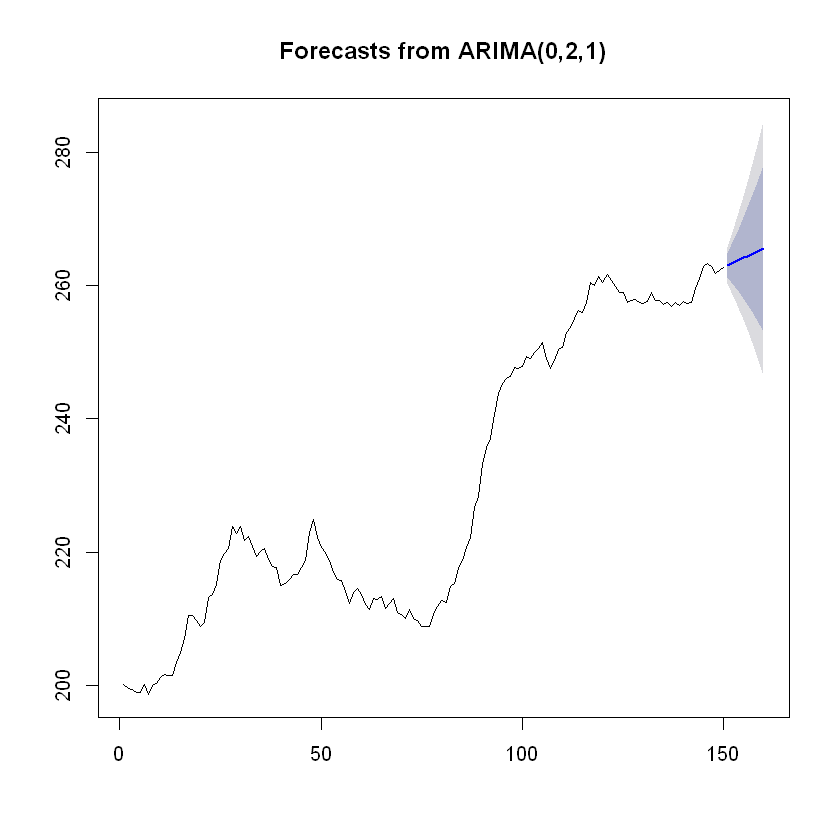

In [12]:

#Using tha bove model, lets forecast the time series
#install.packages('forecast')
library(forecast)
forecast(model)
plot(forecast(model))

# Dark grey represents 80% confidence interval while light gray in the forecast represents 95% CI.
